# Bayesian Machine Learning project

I work with the Arrhythmia dataset from UCI repo.

Class code - class - number of instances:

    01             Normal                245
    02             Ischemic changes (Coronary Artery Disease)   44
    03             Old Anterior Myocardial Infarction           15
    04             Old Inferior Myocardial Infarction           15
    05             Sinus tachycardy        13
    06             Sinus bradycardy        25
    07             Ventricular Premature Contraction (PVC)       3
    08             Supraventricular Premature Contraction       2
    09             Left bundle branch block         9 
    10             Right bundle branch block       50
    11             1. degree AtrioVentricular block       0 
    12             2. degree AV block                0
    13             3. degree AV block                0
    14             Left ventricule hypertrophy                4
    15             Atrial Fibrillation or Flutter               5
    16             Others                 22

# Importing libraries and data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import itertools

import scipy as sc
from scipy.io import arff
from scipy import optimize

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

from sklearn.metrics import accuracy_score, log_loss, roc_curve, roc_auc_score, confusion_matrix 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
arff_file = arff.loadarff('dataset_5_arrhythmia.arff')
df = pd.DataFrame(arff_file[0])

# Data cleaning

In [84]:
# Code to check if a variable is a string (bits encoded) and, eventually, convert it into an integer
for var in df.columns:
    if df[var].dtype == 'O':
        df[var] = df[var].apply(lambda x: int(str(x).split("'")[1]))

In [85]:
# Code to check they are all either float or int types
for var in df.columns:
    print(df[var].dtype)

float64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
fl

In [86]:
# Code to drop a column if it has missing values (this is the case for 5 variables)
df = df.dropna(axis=1, how='any')
df.shape

(452, 275)

In [87]:
df.describe()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [88]:
# definitely encoding errors
df = df[df['height']!=780]
df = df[df['age']!=0]

In [89]:
df.describe()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,450.000000,450.000000,450.0,450.000000,450.000000,450.000000,450.000000,450.000000
mean,46.675556,0.551111,163.842222,68.437778,88.942222,155.195556,367.797778,170.086667,90.035556,33.353333,...,-0.278667,9.067111,-1.441333,0.004000,0.0,0.513111,1.220667,19.432222,29.588222,3.875556
std,16.214228,0.497934,10.412195,16.132715,15.394913,44.918555,32.260307,35.644734,25.834294,45.254362,...,0.549580,3.468655,1.992218,0.050229,0.0,0.346322,1.427738,13.430692,18.453662,4.416267
min,1.000000,0.000000,105.000000,10.000000,55.000000,0.000000,240.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.250000,...,-0.400000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.500000,17.725000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.500000,157.000000,367.500000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.150000,28.100000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.875000,41.175000,6.000000
max,83.000000,1.000000,190.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [90]:
# Code to create a new binary target variable y: y=0 for normal ECG; y=1 for anomalous ECG
y = []
for elem in df['class']:
    if elem == 1:
        y.append(0)
    else:
        y.append(1)

# Distribution of the 2 classes
pd.Series(y).value_counts() 

0    245
1    205
Name: count, dtype: int64

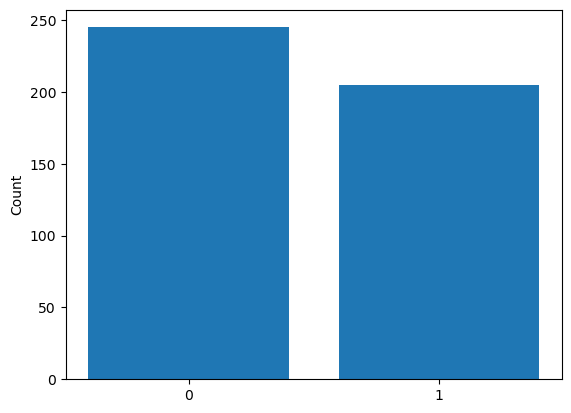

In [91]:
data = y  # Replace with your data

# Counting occurrences of 0s and 1s
counts = [data.count(0), data.count(1)]

# Categories
categories = ['0', '1']

# Creating bar plot
plt.bar(categories, counts)

# Adding labels and title
plt.xlabel('')
plt.ylabel('Count')
plt.title('')

# Display the plot
plt.show()

In [92]:
# Code to insert y in the df as the first column
df.insert(0, 'y', y) 
class_move = df.pop("class")
df.insert(0, "class", class_move)
df

,class,y,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,8,1,75.0,0,190.0,80.0,91.0,193.0,371.0,174.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,6,1,56.0,1,165.0,64.0,81.0,174.0,401.0,149.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,10,1,54.0,0,172.0,95.0,138.0,163.0,386.0,185.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,1,0,55.0,0,175.0,94.0,100.0,202.0,380.0,179.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,7,1,75.0,0,190.0,80.0,88.0,181.0,360.0,177.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1,0,53.0,1,160.0,70.0,80.0,199.0,382.0,154.0,...,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5
448,10,1,37.0,0,190.0,85.0,100.0,137.0,361.0,201.0,...,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4
449,2,1,36.0,0,166.0,68.0,108.0,176.0,365.0,194.0,...,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2
450,1,0,32.0,1,155.0,55.0,93.0,106.0,386.0,218.0,...,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6


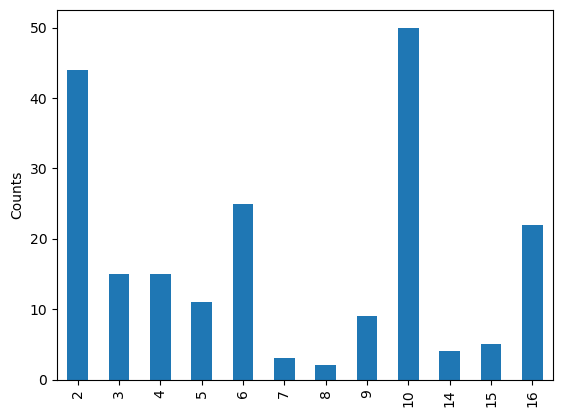

In [93]:
# More details about abnormal ECGs
categorical_data = df[df['class'] != 1]['class'] 

# Convert the list into a pandas Series
series_data = pd.Series(categorical_data)

# Get the count of each category
category_counts = series_data.value_counts().sort_index()

# Plotting the bar plot
category_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('')
plt.ylabel('Counts')
plt.title('')

# Display the plot
plt.show()

In [94]:
df['class'].value_counts().sort_index()

class
1     245
2      44
3      15
4      15
5      11
6      25
7       3
8       2
9       9
10     50
14      4
15      5
16     22
Name: count, dtype: int64

In [95]:
for var in df.columns:
    print(var)

class
y
age
sex
height
weight
QRSduration
PRinterval
Q-Tinterval
Tinterval
Pinterval
QRS
chDI_Qwave
chDI_Rwave
chDI_Swave
chDI_RPwave
chDI_SPwave
chDI_intrinsicReflecttions
chDI_RRwaveExists
chDI_DD_RRwaveExists
chDI_RPwaveExists
chDI_DD_RPwaveExists
chDI_RTwaveExists
chDI_DD_RTwaveExists
chDII_Qwave
chDII_Rwave
chDII_Swave
chDII_RPwave
chDII_SPwave
chDII_intrinsicReflecttions
chDII_RRwaveExists
chDII_DD_RRwaveExists
chDII_RPwaveExists
chDII_DD_RPwaveExists
chDII_RTwaveExists
chDII_DD_RTwaveExists
chDIII_Qwave
chDIII_Rwave
chDIII_Swave
chDIII_RPwave
chDIII_SPwave
chDIII_intrinsicReflecttions
chDIII_RRwaveExists
chDIII_DD_RRwaveExists
chDIII_RPwaveExists
chDIII_DD_RPwaveExists
chDIII_RTwaveExists
chDIII_DD_RTwaveExists
chAVR_Qwave
chAVR_Rwave
chAVR_Swave
chAVR_RPwave
chAVR_SPwave
chAVR_intrinsicReflecttions
chAVR_RRwaveExists
chAVR_DD_RRwaveExists
chAVR_RPwaveExists
chAVR_DD_RPwaveExists
chAVR_RTwaveExists
chAVR_DD_RTwaveExists
chAVL_Qwave
chAVL_Rwave
chAVL_Swave
chAVL_RPwave
chAVL_SPwa

In [96]:
# Code to drop variables that are constantly equal to zero
for var in df.columns:
    if df[var].min() == df[var].max():
        print(var, df[var].min(), df[var].max())
        df = df.drop(var, axis=1)

chDI_SPwave 0.0 0.0
chAVL_SPwave 0.0 0.0
chAVL_RRwaveExists 0 0
chAVL_DD_RTwaveExists 0 0
chAVF_RPwaveExists 0 0
chV4_RPwaveExists 0 0
chV4_DD_RPwaveExists 0 0
chV5_SPwave 0.0 0.0
chV5_RRwaveExists 0 0
chV5_RPwaveExists 0 0
chV5_RTwaveExists 0 0
chV6_SPwave 0.0 0.0
chV6_DD_RPwaveExists 0 0
chV6_RTwaveExists 0 0
chDI_SPwaveAmp 0.0 0.0
chAVL_SPwaveAmp 0.0 0.0
chV5_SPwaveAmp 0.0 0.0
chV6_SPwaveAmp 0.0 0.0


# Useful functions

In [16]:
def sigma(x,beta):
    xbeta = x.dot(beta)*(-1)
    d = 1. + pd.Series(xbeta).apply(float).apply(np.exp)
    return d**(-1)
# function for sigmoid function

In [17]:
def nll(beta, x, y):
    t = y.T.dot(np.log(sigma(x,beta)))+ (1-y).T.dot(np.log(1.-sigma(x,beta)))
    return -t
# function for negative log-likelihood

In [18]:
# function to the gradient
def fprime(beta,x,y):
    return  x.T.dot(sigma(x,beta)-y) 

# function to find the Hessian matrix
def Hessian(beta,x):  
    S = np.diag(sigma(x,beta)*(1-sigma(x,beta)))
    hes = x.T.dot(S.dot(x))
    return hes

# Newton-Raphson algorithm to minimize the log-likelihood
def NewtonRaphsonLogistReg(beta0,x,y,maxiter,tolerance):
    i = 0
    beta = beta0
    NegLogLike = nll(beta,x,y)
    AbDiff = 1; #anything bigger than tolerance would do here
    while (AbDiff> tolerance) & (i<maxiter):
        i =i+1;
        print('iteration ',i,' Negative Log likelihood ',NegLogLike, ' AbDiff ', AbDiff)
        grad = fprime(beta,x,y)
        H = Hessian(beta,x)
        H_inv = sc.linalg.inv(H) 
        beta = beta - H_inv.dot(grad)
        NegLogLike_new = nll(beta,x,y)
        AbDiff = np.abs(NegLogLike_new-NegLogLike)
        NegLogLike = NegLogLike_new
    if (iter == maxiter):
        print('Did not Converge') 
    return beta, H_inv

In [19]:
def neg_post(beta, x, y, m0, S0):
    logprior =  - .5* (beta-m0).T @ S0 @ (beta-m0)
    return  nll(beta, x, y) -  logprior
def neg_post_prime(beta, x, y, m0, S0):
    return  x.T.dot(sigma(x,beta)-y)+S0.dot(beta-m0)
def laplace_prec(beta, x, S0):
    n = x.shape[0]  
    S = np.diag(sigma(x,beta)*(1-sigma(x,beta)))
    prec = S0.values + x.T.dot(S.dot(x))    
    return prec
def NewtonRaphsonBayesLogReg(beta0,x,y,m0,S0,maxiter,tolerance):
    i = 0
    beta = beta0
    NegLogPost = neg_post(beta, x, y, m0, S0)
    AbDiff = 1; #anything bigger than tolerance would do here
    while (AbDiff> tolerance) & (i<maxiter):
        i =i+1;
        print('iteration ',i,' Negative Log Posterior ',NegLogPost, ' AbDiff ', AbDiff)
        grad = neg_post_prime(beta, x, y, m0, S0)
        H = laplace_prec(beta, x, S0)
        H_inv = np.linalg.inv(np.asarray(H, dtype=float))
        beta = beta - H_inv.dot(grad)
        NegLogPost_new = neg_post(beta, x, y, m0, S0)
        AbDiff = np.abs(NegLogPost_new-NegLogPost)
        NegLogPost = NegLogPost_new
    if (iter == maxiter):
        print('Did not Converge') 
    return beta, H_inv

# Data preprocessing

In [97]:
# Splitting into train and test set
predictors = list(df.columns[2:]) # I am only excluding y and class from the list of predictors
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df['y'],
                        test_size=0.2, random_state=42)
n,p = X_train.shape # dimensions of training set
print(n,p)

360 256


In [98]:
# Separately standardised training and test set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [99]:
# Initialize PCA object without specifying the number of components
pca = PCA()

# Fit PCA to the scaled training data
pca.fit(X_train_scaled)

# Calculate the cumulative explained variance to see the proportion of variance explained
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to keep based on a threshold (in this case, 95% of variance explained)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(n_components)

94


In [100]:
# Initialize PCA object with the determined number of components
pca_final = PCA(n_components=n_components)

# Fit PCA to the scaled data with the final number of components
pca_final.fit(X_train_scaled)

# Transform the data onto the new feature space
X_train_pca = pca_final.transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

In [101]:
print(X_train_pca.shape, X_test_pca.shape)

(360, 94) (90, 94)


In [102]:
n,p = X_train_pca.shape

# Binary classification 

We are going to consider a two-class classification problem: presence and absence of cardiac arryhthmia. Hence, we are considering y and not class as target variable

In [103]:
# Just to simplify names:
X_train = X_train_pca
X_test = X_test_pca

In [104]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(360, 94) (90, 94) (360,) (90,)


### Logistic regression. 
It models the p(y=1|X), so given a set of covariates. In this case, there is not closed form, so we need an optimizer.

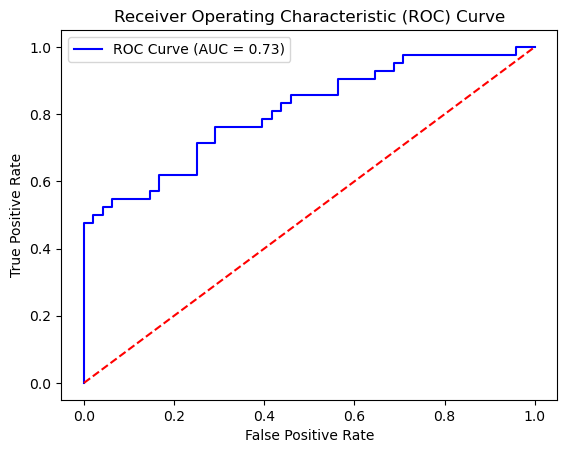

0.7333333333333333
0.7261904761904763
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        48
           1       0.76      0.62      0.68        42

    accuracy                           0.73        90
   macro avg       0.74      0.73      0.73        90
weighted avg       0.74      0.73      0.73        90



In [105]:
lr = LogisticRegression(fit_intercept=True,solver='lbfgs',max_iter=10000)
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)
pred_probs_lr = lr.predict_proba(X_test)[:,1]
pred_class_lr = (pred_probs_lr > .5)

acc_lr = accuracy_score(y_test,pred_class_lr) # accuracy
auc_lr = roc_auc_score(y_test, y_pred_lr)

# False Positive Rate, True Positive Rate, Threshold
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, pred_probs_lr) 

# Plot ROC curve
plt.plot(fpr_lr, tpr_lr, color='blue', label='ROC Curve (AUC = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(acc_lr)
print(auc_lr)
print(classification_report(y_test, y_pred_lr))

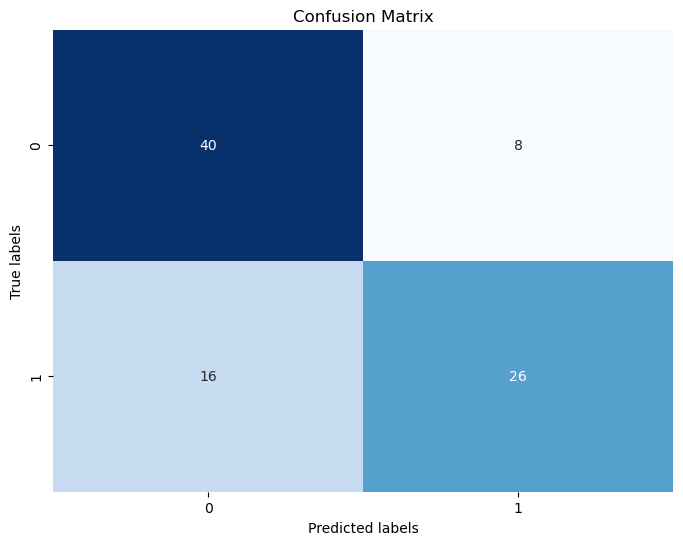

In [106]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Bayesian logistic regression

In [107]:
# Use X_train here!
Xt_train = sm.add_constant(X_train)
Xt_train = pd.DataFrame(Xt_train)
Xt_test = sm.add_constant(X_test)
Xt_test = pd.DataFrame(Xt_test)
y_train = y_train.reset_index(drop=True)
n,p = Xt_train.shape
m0 = np.zeros(p)
S0 = pd.DataFrame(Xt_train.T.dot(Xt_train)/n)
beta0 = np.zeros(p)
tolerance = 1e-05
maxiter = 10000
beta_map, cov = NewtonRaphsonBayesLogReg(beta0,Xt_train, y_train,
                                                  m0,S0,maxiter,tolerance)

iteration  1  Negative Log Posterior  249.5329850015803  AbDiff  1
iteration  2  Negative Log Posterior  139.9777438232748  AbDiff  109.5552411783055
iteration  3  Negative Log Posterior  122.73642440674706  AbDiff  17.241319416527745
iteration  4  Negative Log Posterior  117.2434232582352  AbDiff  5.4930011485118655
iteration  5  Negative Log Posterior  116.03936489866999  AbDiff  1.2040583595652095
iteration  6  Negative Log Posterior  115.98709301563387  AbDiff  0.052271883036112854
iteration  7  Negative Log Posterior  115.98677887957358  AbDiff  0.00031413606029673247


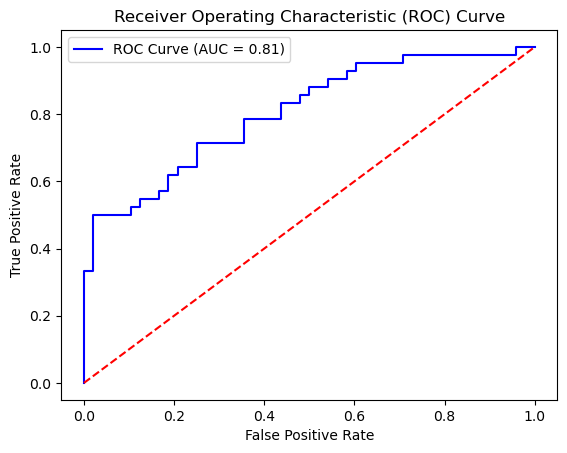

0.7222222222222222
0.8050595238095238
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        48
           1       0.74      0.62      0.68        42

    accuracy                           0.72        90
   macro avg       0.73      0.72      0.72        90
weighted avg       0.72      0.72      0.72        90



In [108]:
#Evaluate predictive performance of Bayesian Logistic Regression
N = 10000 #number of Monte Carlo samples
# draw N samples from the approximate posterior (Laplace) of beta
betas = np.random.multivariate_normal(beta_map,cov,N)
Xbetas = Xt_test.dot(betas.T)
#apply sigmoid
d = 1/(1. + np.exp(-Xbetas))

pred_probs_blr = np.mean(d, axis=1)
pred_class_blr = (pred_probs_blr > .5)

acc_blr = np.sum(pred_class_blr==y_test.reset_index(drop=True))/len(y_test) 
auc_blr = roc_auc_score(y_test, pred_probs_blr)

fpr_blr,tpr_blr,thresholds_blr = roc_curve(y_test,pred_probs_blr)

# Plot ROC curve
plt.plot(fpr_blr, tpr_blr, color='blue', label='ROC Curve (AUC = %0.2f)' % auc_blr)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(acc_blr)
print(auc_blr)
print(classification_report(y_test, pred_class_blr))

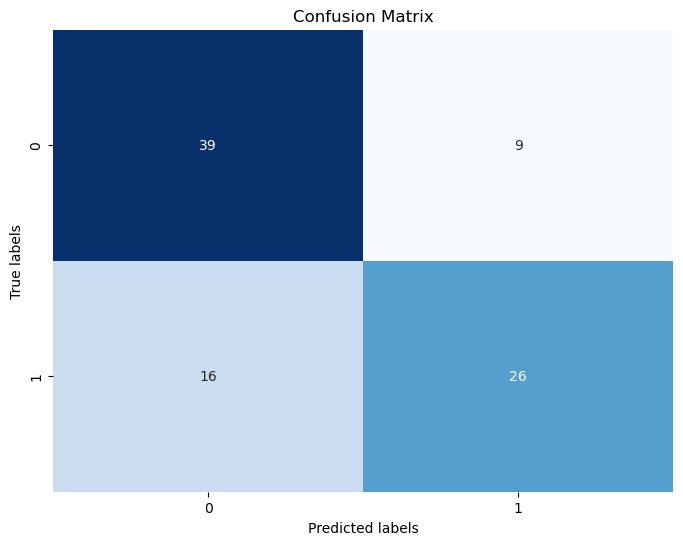

In [109]:
cm_blr = confusion_matrix(y_test, pred_class_blr)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_blr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Linear discriminant analysis

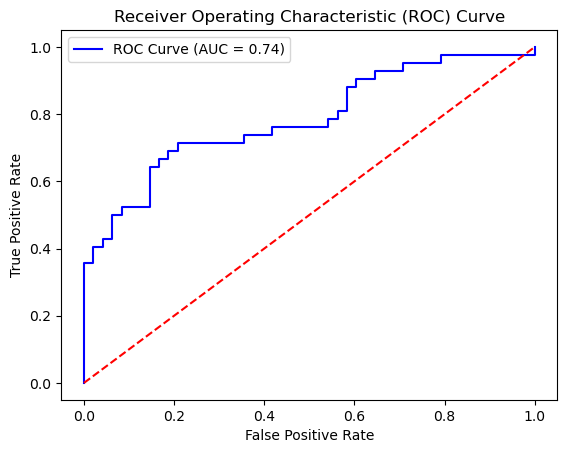

0.7444444444444445
0.7366071428571428
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        48
           1       0.79      0.62      0.69        42

    accuracy                           0.74        90
   macro avg       0.75      0.74      0.74        90
weighted avg       0.75      0.74      0.74        90



In [110]:
lda = LinearDiscriminantAnalysis(solver='lsqr',store_covariance=True)
lda.fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)
pred_probs_lda = lda.predict_proba(X_test)[:,1]
pred_class_lda = (pred_probs_lda > .5)

acc_lda = accuracy_score(y_test, y_pred_lda)
auc_lda = roc_auc_score(y_test, y_pred_lda)

fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, pred_probs_lda)

# Plot ROC curve
plt.plot(fpr_lda, tpr_lda, color='blue', label='ROC Curve (AUC = %0.2f)' % auc_lda)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(acc_lda)
print(auc_lda)
print(classification_report(y_test, y_pred_lda))

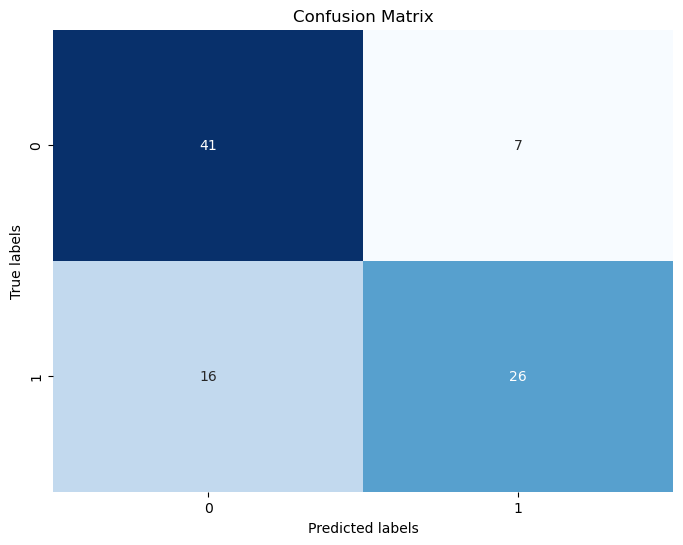

In [111]:
cm_lda = confusion_matrix(y_test, y_pred_lda)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### QDA

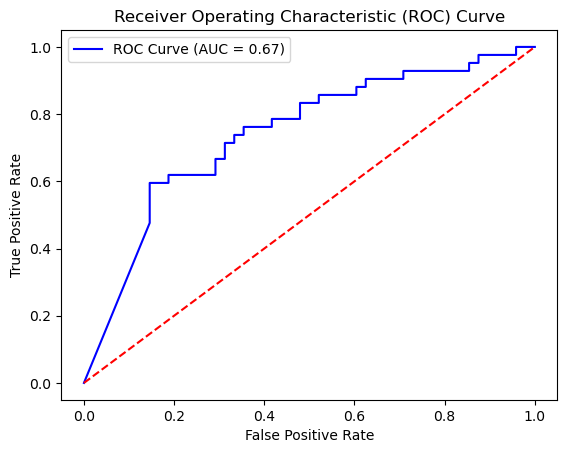

0.6777777777777778
0.6741071428571429
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        48
           1       0.67      0.62      0.64        42

    accuracy                           0.68        90
   macro avg       0.68      0.67      0.67        90
weighted avg       0.68      0.68      0.68        90



In [112]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred_qda = qda.predict(X_test)
pred_probs_qda = qda.predict_proba(X_test)[:,1]
pred_class_qda = (pred_probs_qda > .5)

acc_qda = accuracy_score(y_test, y_pred_qda)
auc_qda = roc_auc_score(y_test, y_pred_qda)

fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, pred_probs_qda)

# Plot ROC curve
plt.plot(fpr_qda, tpr_qda, color='blue', label='ROC Curve (AUC = %0.2f)' % auc_qda)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(acc_qda)
print(auc_qda)
print(classification_report(y_test, y_pred_qda))

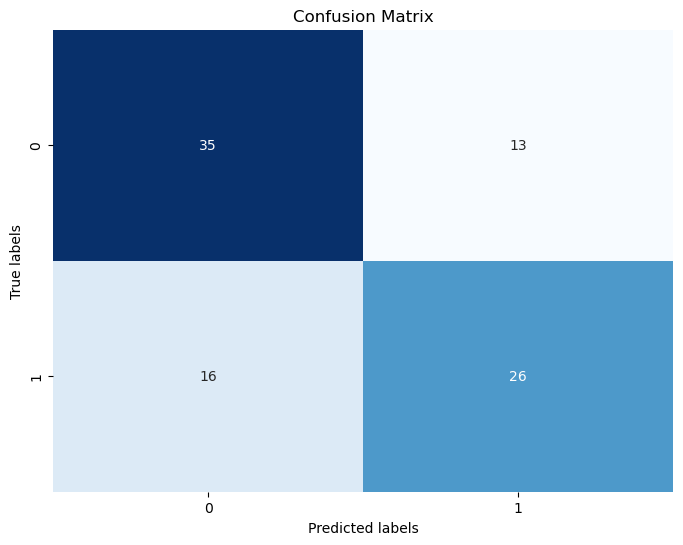

In [113]:
cm_qda = confusion_matrix(y_test, y_pred_qda)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_qda, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Random forest

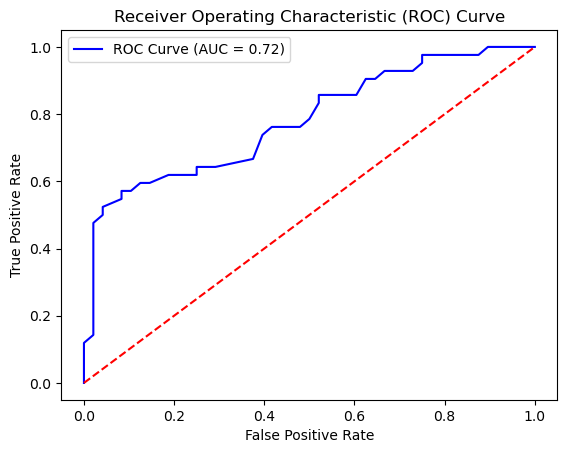

0.7333333333333333
0.7247023809523809
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        48
           1       0.78      0.60      0.68        42

    accuracy                           0.73        90
   macro avg       0.74      0.72      0.72        90
weighted avg       0.74      0.73      0.73        90



In [114]:
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
pred_probs_rf = rf.predict_proba(X_test)[:,1]
pred_class_rf = (pred_probs_rf > .5)

acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, pred_probs_rf)

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf, color='blue', label='ROC Curve (AUC = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(acc_rf)
print(auc_rf)
print(classification_report(y_test, y_pred_rf))

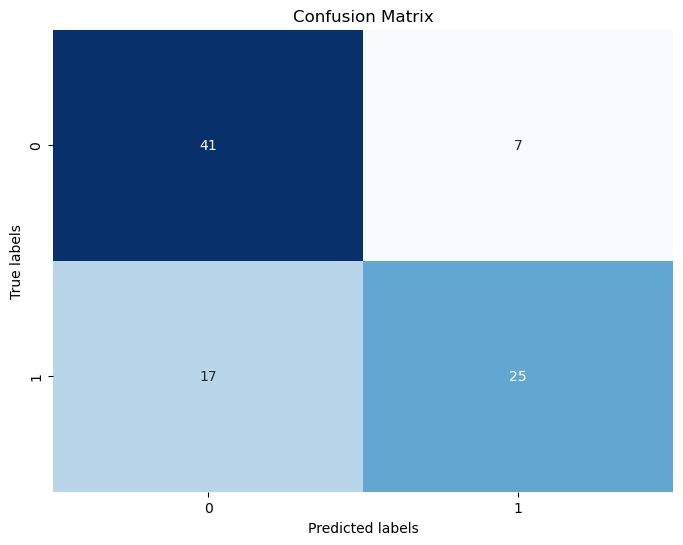

In [115]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### KNN

In [116]:
param_grid = {'n_neighbors': range(1, 101)}
knn_search = KNeighborsClassifier()

# Grid search to define the optimal number k, performing a 5-fold cross-validation
grid_search = GridSearchCV(knn_search, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
k = grid_search.best_estimator_.n_neighbors

Best Parameters: {'n_neighbors': 3}
Best Accuracy: 0.6694444444444445


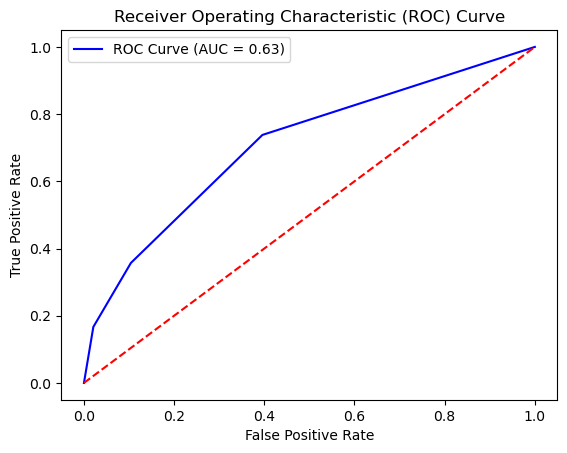

0.6444444444444445
0.6264880952380952
              precision    recall  f1-score   support

           0       0.61      0.90      0.73        48
           1       0.75      0.36      0.48        42

    accuracy                           0.64        90
   macro avg       0.68      0.63      0.61        90
weighted avg       0.68      0.64      0.61        90



In [117]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
pred_probs_knn = knn.predict_proba(X_test)[:,1]
pred_class_knn = (pred_probs_knn > .5)

acc_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, pred_probs_knn)

# Plot ROC curve
plt.plot(fpr_knn, tpr_knn, color='blue', label='ROC Curve (AUC = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(acc_knn)
print(auc_knn)
print(classification_report(y_test, y_pred_knn))

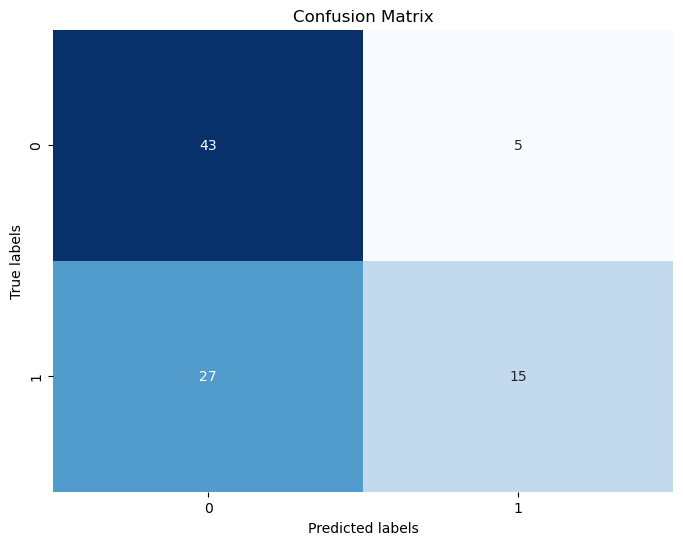

In [118]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

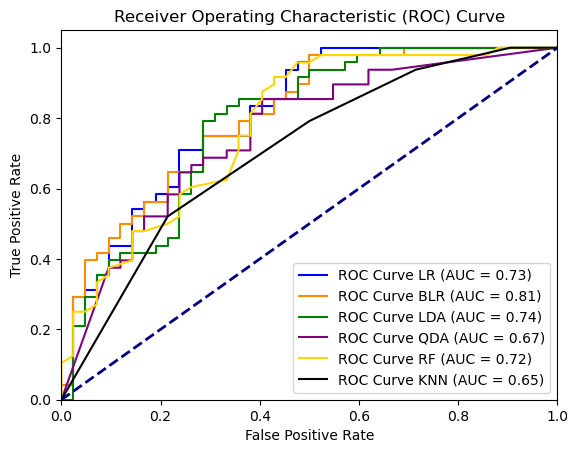

In [79]:
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', label='ROC Curve LR (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_blr, tpr_blr, color='darkorange', label='ROC Curve BLR (AUC = %0.2f)' % auc_blr)
plt.plot(fpr_lda, tpr_lda, color='green', label='ROC Curve LDA (AUC = %0.2f)' % auc_lda)
plt.plot(fpr_qda, tpr_qda, color='purple', label='ROC Curve QDA (AUC = %0.2f)' % auc_qda)
plt.plot(fpr_rf, tpr_rf, color='gold', label='ROC Curve RF (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_knn, tpr_knn, color='black', label='ROC Curve KNN (AUC = %0.2f)' % auc_knn)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Clustering

In [150]:
df

,class,y,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,...,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,8,1,75.0,0,190.0,80.0,91.0,193.0,371.0,174.0,...,62.9,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4
1,6,1,56.0,1,165.0,64.0,81.0,174.0,401.0,149.0,...,43.4,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8
2,10,1,54.0,0,172.0,95.0,138.0,163.0,386.0,185.0,...,48.2,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0
3,1,0,55.0,0,175.0,94.0,100.0,202.0,380.0,179.0,...,68.0,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6
4,7,1,75.0,0,190.0,80.0,88.0,181.0,360.0,177.0,...,48.9,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1,0,53.0,1,160.0,70.0,80.0,199.0,382.0,154.0,...,-0.6,0.0,0.0,4.3,-5.0,0.0,0.7,0.6,-4.4,-0.5
448,10,1,37.0,0,190.0,85.0,100.0,137.0,361.0,201.0,...,82.5,-0.5,0.0,15.6,-1.6,0.0,0.4,2.4,38.0,62.4
449,2,1,36.0,0,166.0,68.0,108.0,176.0,365.0,194.0,...,-63.6,1.2,0.0,16.3,-28.6,0.0,1.5,1.0,-44.2,-33.2
450,1,0,32.0,1,155.0,55.0,93.0,106.0,386.0,218.0,...,61.0,0.2,-0.4,12.0,-0.7,0.0,0.5,2.4,25.0,46.6


In [151]:
# subset of df only with initial vars and channel DII, which technically is the most important for arrythmias
var = ['class','y','age','sex','height','weight','QRSduration','PRinterval','Q-Tinterval','Tinterval',
       'Pinterval','QRS']
arr = df[var]

# ,'chDII_Qwave','chDII_Rwave','chDII_Swave','chDII_RPwave','chDII_SPwave',
#       'chDII_intrinsicReflecttions','chDII_RRwaveExists','chDII_DD_RRwaveExists','chDII_RPwaveExists',
#       'chDII_DD_RPwaveExists','chDII_RTwaveExists','chDII_DD_RTwaveExists'

In [152]:
arr

,class,y,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS
0,8,1,75.0,0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0
1,6,1,56.0,1,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0
2,10,1,54.0,0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0
3,1,0,55.0,0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0
4,7,1,75.0,0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
447,1,0,53.0,1,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0
448,10,1,37.0,0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0
449,2,1,36.0,0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0
450,1,0,32.0,1,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0


In [153]:
lowest_bic = np.infty

#Consider k=1,...,6 and four types of covariance matrix
n_components_range = range(1, 21)
cv_types = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(n_components_range),len(cv_types))) #matrix to store the BICs
j = -1
for cv_type in cv_types:
    j = j+1
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                             covariance_type=cv_type,
                             random_state=17)
        gmm.fit(arr.iloc[:,2:])
        bicij = gmm.bic(arr.iloc[:,2:])  #get the BIC 
        bic[n_components-1,j] = bicij
        #the code below keeps track of the model with the lowest BIC
        if bicij < lowest_bic:
            lowest_bic = bicij
            best_gmm = gmm
print(lowest_bic)
bic = pd.DataFrame(bic,columns = cv_types,index=n_components_range)
bic

# effettivamente sono 12 --> vicino a 13 che sono le classi vere di aritmie... alcune sono molto piccole quindi 
# magari due sono state accorpate

31248.401413711905


,spherical,tied,diag,full
1,42859.269826,37340.381065,37959.102808,37340.381065
2,41674.819958,37110.034430,32355.797469,36524.253957
3,41086.686829,37268.577895,31869.686229,36860.661257
4,40832.414094,36922.308113,31459.057245,36508.539326
5,40790.844308,37133.338458,31387.857653,36714.098989
6,40716.609077,37024.976577,31400.390815,36880.922388
7,40641.242031,31515.460313,31481.351934,36920.645656
8,40556.275373,36063.589861,31497.313825,37145.287185
9,40558.001979,31486.646381,31279.187272,37402.111569
10,40563.353124,36135.766038,31363.121652,37190.920810


In [154]:
probs = best_gmm.predict_proba(arr.iloc[:,2:])
print(np.sum(probs,axis=0))

[ 11.98724979  43.37765911  33.22260218   1.           7.99458367
  43.31367176  18.         104.67976848  62.25094854   1.
   1.          75.37253522   4.96489745  41.83608379]


/var/folders/p2/rq2gfgvx31xf_wfdxkkjc3wm0000gn/T/ipykernel_79839/1925295295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr['cluster'] = best_gmm.predict(arr.iloc[:,2:])


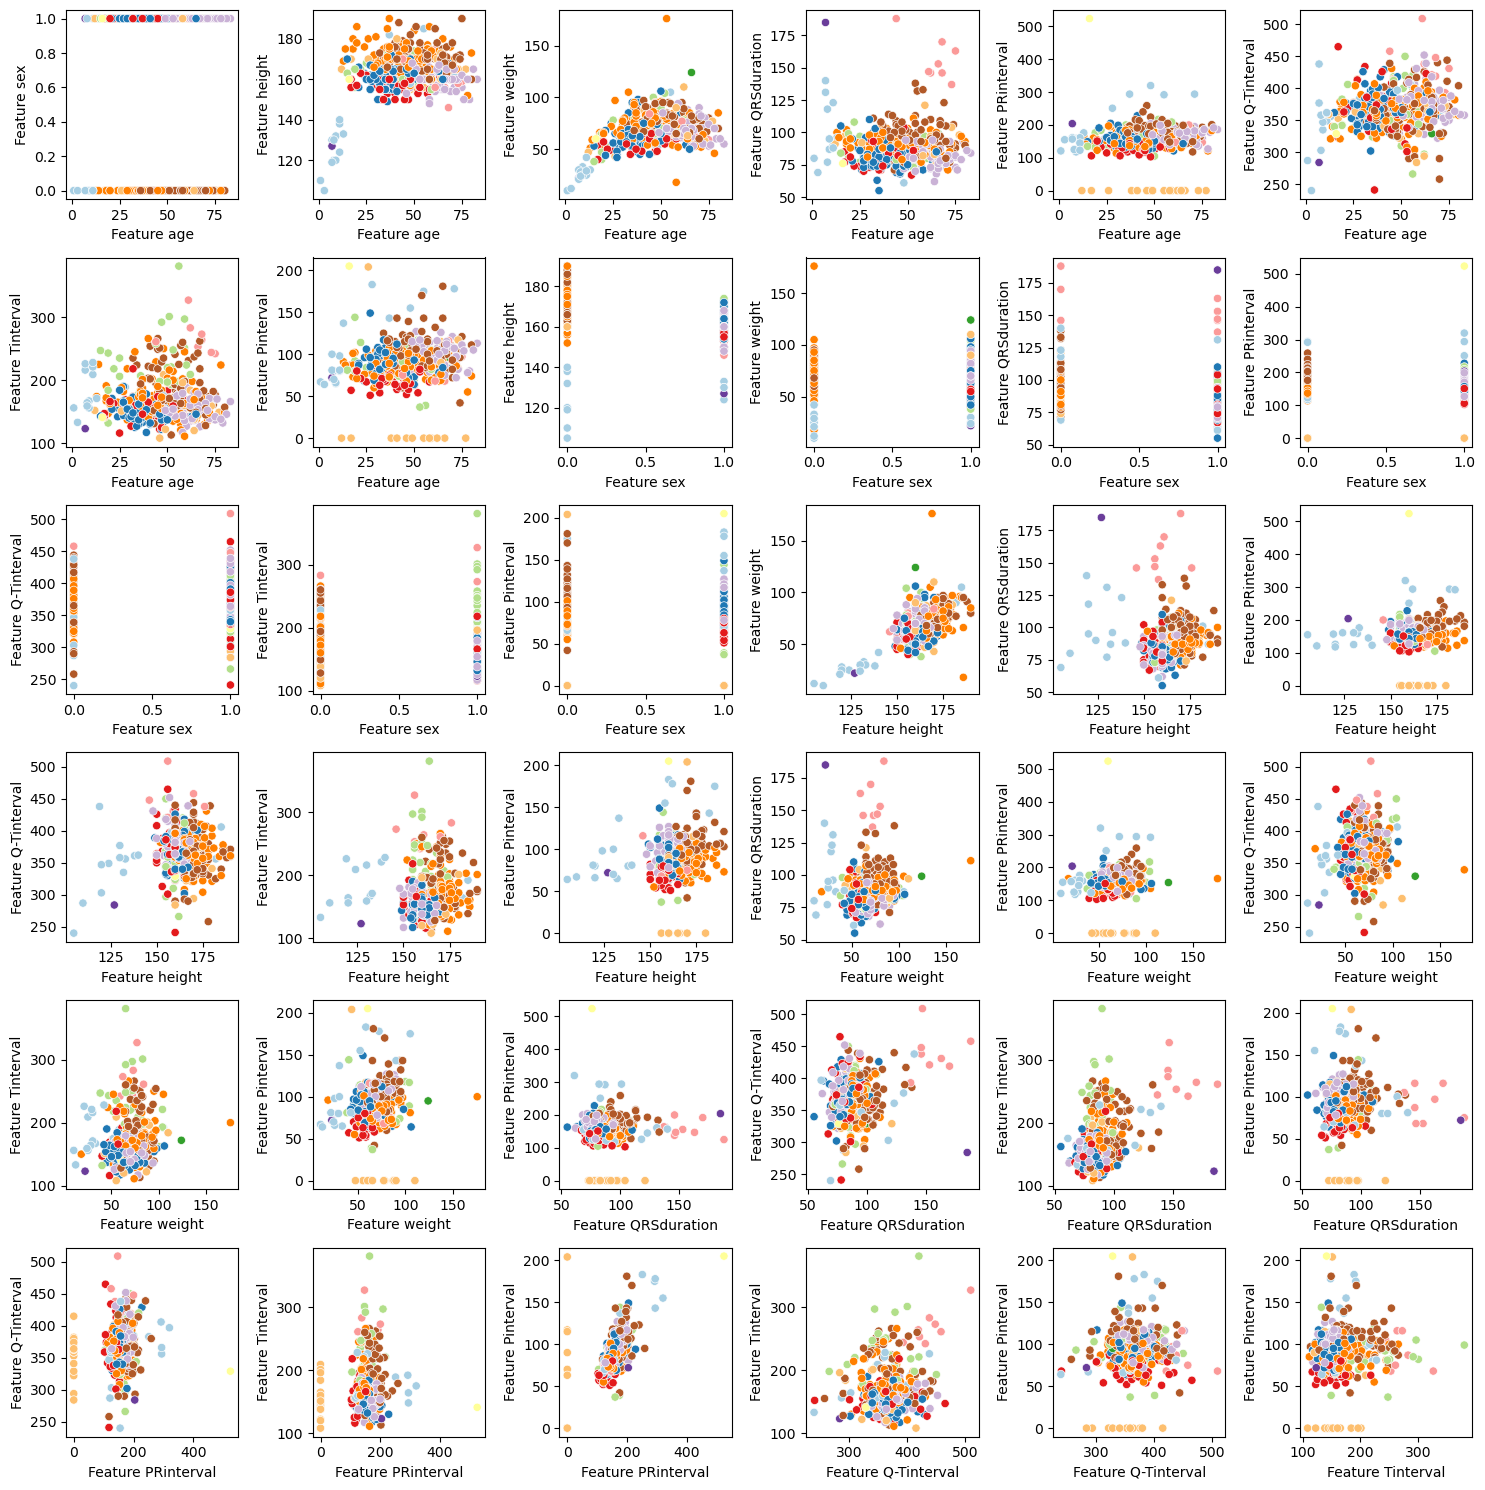

In [147]:
best_gmm.fit(arr.iloc[:,2:])
arr['cluster'] = best_gmm.predict(arr.iloc[:,2:])

pairs = list(itertools.combinations(range(2,11),2))

# Create subplots for each pairwise combination
plt.figure(figsize=(15, 15))
for i, pair in enumerate(pairs, start=1):
    plt.subplot(6, 6, i)
    sns.scatterplot(x=arr.iloc[:, pair[0]], y=arr.iloc[:, pair[1]], hue=arr['cluster'], palette="Paired", legend=False)
    plt.xlabel(f'Feature {arr.columns[pair[0]]}')
    plt.ylabel(f'Feature {arr.columns[pair[1]]}')
plt.tight_layout()
plt.show()

/var/folders/p2/rq2gfgvx31xf_wfdxkkjc3wm0000gn/T/ipykernel_79839/2256552853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr['cluster'] = best_gmm.predict(arr.iloc[:,2:])


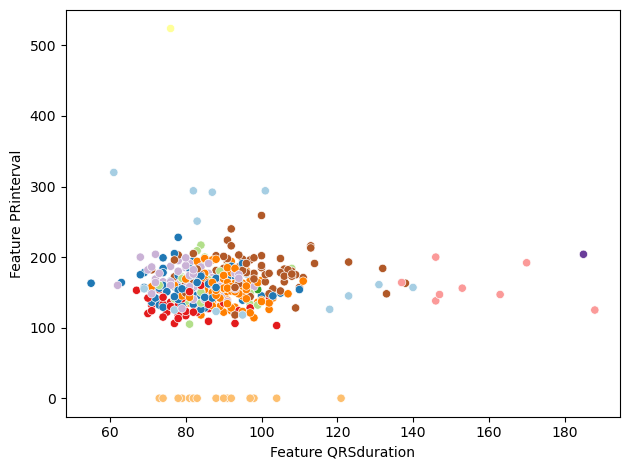

In [157]:
best_gmm.fit(arr.iloc[:,2:])
arr['cluster'] = best_gmm.predict(arr.iloc[:,2:])

sns.scatterplot(x=arr.iloc[:, 6], y=arr.iloc[:, 7], hue=arr['cluster'], palette="Paired", legend=False)
plt.xlabel(f'Feature {arr.columns[6]}')
plt.ylabel(f'Feature {arr.columns[7]}')
plt.tight_layout()
plt.show()

/var/folders/p2/rq2gfgvx31xf_wfdxkkjc3wm0000gn/T/ipykernel_79839/30517562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr['cluster'] = best_gmm.predict(arr.iloc[:,2:])


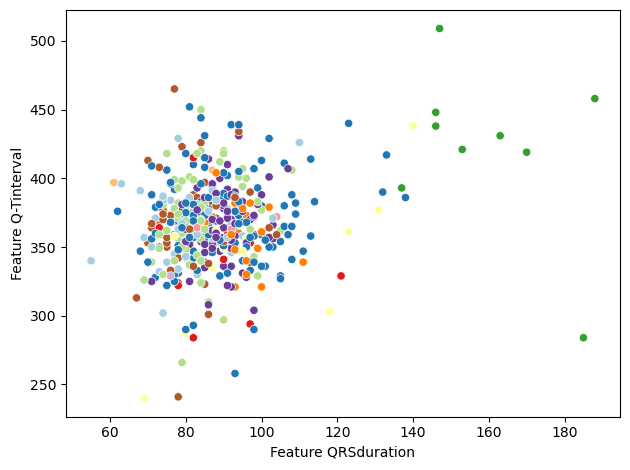

In [158]:
best_gmm.fit(arr.iloc[:,2:])
arr['cluster'] = best_gmm.predict(arr.iloc[:,2:])

sns.scatterplot(x=arr.iloc[:, 6], y=arr.iloc[:, 8], hue=arr['cluster'], palette="Paired", legend=False)
plt.xlabel(f'Feature {arr.columns[6]}')
plt.ylabel(f'Feature {arr.columns[8]}')
plt.tight_layout()
plt.show()